# 2 Perform K Means, DB Scan and Hierarchical Clustering on the perfume dataset and compare the performance of the clusters in three method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [4]:
# Load the perfume dataset
perfume = pd.read_excel('/content/set d q2.xlsx')
perfume.head()

,ajayeb,64558,64556,64543,64543.1,64541,64543.2,64543.3,64541.1,64541.2,...,64541.8,64541.9,64541.10,64541.11,64541.12,64541.13,64528.2,64528.3,64528.4,64528.5
0,ajmal,60502,60489,61485,60487,61485,61513,60515,60500,60500,...,60472,60472,60461,61470,60487,60487,61485,60487,60472,60472
1,amreaj,57040,57040,57040,58041,58041,58041,58041,57042,57042,...,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041
2,aood,71083,72087,71091,71095,71099,72103,71099,72099,72099,...,72095,71095,71095,72103,71103,71103,71103,72103,72103,72098
3,asgar_ali,68209,68209,68216,68216,68223,68223,68223,68223,68230,...,68230,67224,67217,67217,68223,68223,68223,68223,68223,68230
4,bukhoor,71046,71046,71046,71046,71046,71046,71046,71046,71046,...,70049,70049,70049,70048,70049,70048,70046,70046,70048,71048


In [5]:
# Select the features for clustering
X = perfume.iloc[:, 1:].values

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

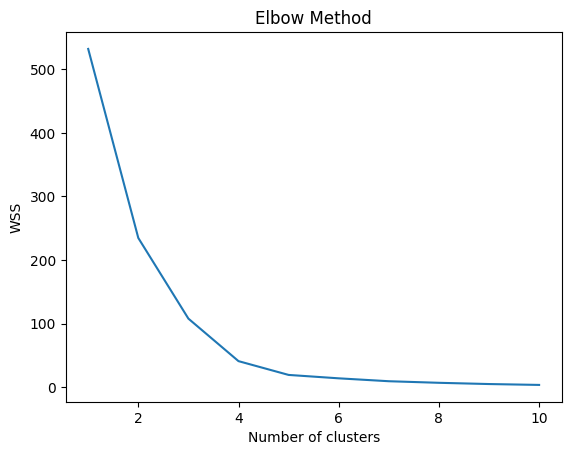

In [6]:
# Find the optimal number of clusters using the elbow method
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

### Optimal No of cluster should be 4

In [8]:
# i) K Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# ii) DBSCAN clustering
dbscan = DBSCAN(eps=0.9, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)

# iii) Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Compute the silhouette score, and Davies-Bouldin score for each model
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X, kmeans_labels)

dbscan_silhouette = silhouette_score(X, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(X, dbscan_labels)

hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(X, hierarchical_labels)


In [12]:
# Compare the performance of the models
print("Performance comparison:")
print("\t\tSilhouette Score\tDavies-Bouldin Score")
print("K Means:\t{:.4f}\t\t\t{:.4f}".format(kmeans_silhouette, kmeans_davies_bouldin))
print("DBSCAN:\t\t{:.4f}\t\t\t{:.4f}".format(dbscan_silhouette, dbscan_davies_bouldin))
print("Hierarchical:\t{:.4f}\t\t\t{:.4f}".format(hierarchical_silhouette, hierarchical_davies_bouldin))


Performance comparison:
		Silhouette Score	Davies-Bouldin Score
K Means:	0.5152			0.4073
DBSCAN:		-0.1093			5.0726
Hierarchical:	0.5331			0.3814


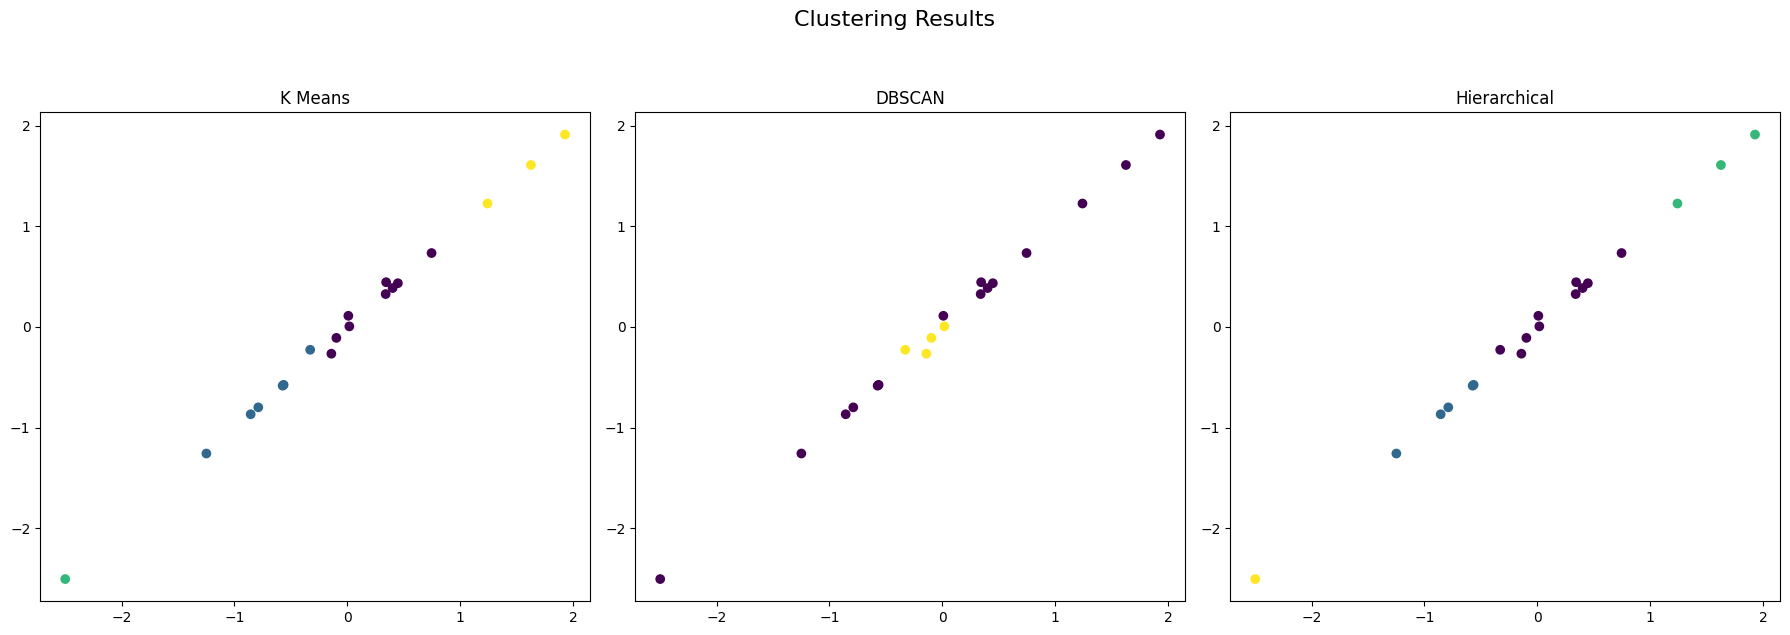

In [13]:
# Plot the clusters
plt.figure(figsize=(18, 6))

# K Means
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K Means")

# DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN")

# Hierarchical
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical")

plt.suptitle("Clustering Results", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()